# Self-Correction in Reasoning Models
Using DeepSeek-R1-Distill-Qwen-1.5B


In [4]:
# Setup repository and dependencies
!git clone https://github.com/elenaajayi/self-correction-cot.git
%cd self-correction-cot
!pip install -r requirements.txt -q


Cloning into 'self-correction-cot'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 45 (delta 2), reused 34 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (45/45), 44.89 KiB | 2.49 MiB/s, done.
Resolving deltas: 100% (2/2), done.
/content/self-correction-cot


In [5]:
# Check GPU
import torch
print(f"GPU: {torch.cuda.get_device_name(0)}")


GPU: NVIDIA A100-SXM4-40GB


In [6]:
# Run the experiment
!python run.py


Self-Correction Experiment on R1-Distill
tokenizer_config.json: 3.07kB [00:00, 12.6MB/s]
tokenizer.json: 7.03MB [00:00, 43.2MB/s]
config.json: 100% 679/679 [00:00<00:00, 5.62MB/s]
`torch_dtype` is deprecated! Use `dtype` instead!
2026-01-03 00:34:29.118205: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-03 00:34:29.138383: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767400469.157604    3804 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767400469.163010    3804 cuda_blas.cc:1407] Unable to register cuBLAS factory:

In [7]:
# Display results
import json
with open("results.json") as f:
    results = json.load(f)
print(f"Total results: {len(results)}")


Total results: 300


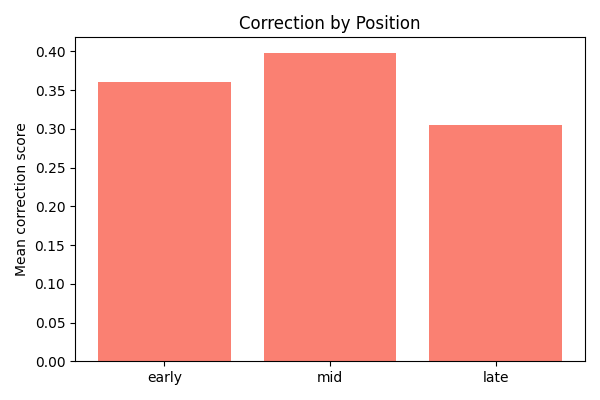

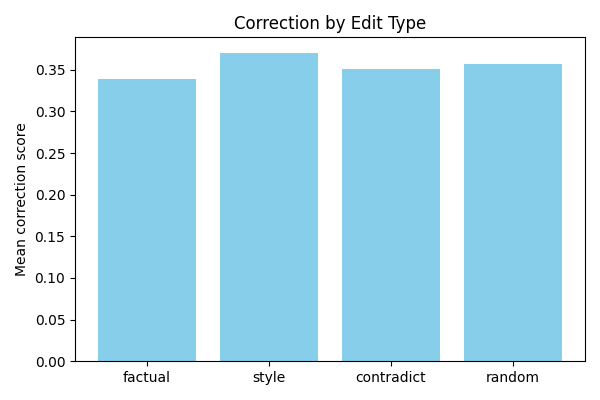

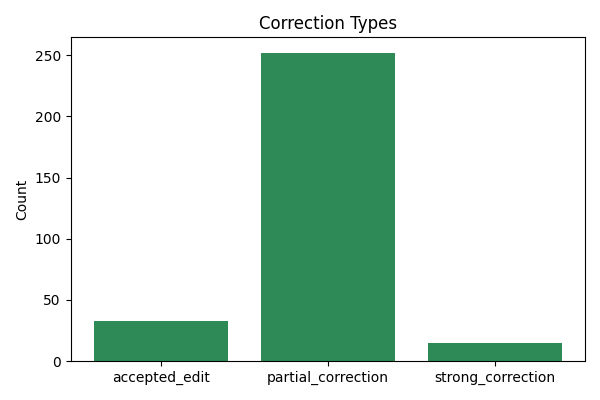

In [8]:
# Show plots
from IPython.display import Image, display
import os
for f in os.listdir("plots"):
    display(Image(f"plots/{f}"))


In [9]:
from google.colab import files
import shutil


In [10]:
shutil.make_archive('results_bundle', 'zip', '.', 'results.json')
!zip -r results_bundle.zip results.json plots/

updating: results.json (deflated 96%)
  adding: plots/ (stored 0%)
  adding: plots/by_position.png (deflated 19%)
  adding: plots/by_edit_type.png (deflated 17%)
  adding: plots/correction_types.png (deflated 18%)


In [11]:
files.download('results_bundle.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
!git clone https://github.com/elenaajayi/self-correction-cot.git
%cd self-correction-cot
!pip install -r requirements.txt -q
!python run_mechanistic.py

Cloning into 'self-correction-cot'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 58 (delta 7), reused 47 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (58/58), 115.92 KiB | 4.00 MiB/s, done.
Resolving deltas: 100% (7/7), done.
/content/self-correction-cot/self-correction-cot/self-correction-cot
Loading model/tokenizer...
`torch_dtype` is deprecated! Use `dtype` instead!
2026-01-03 01:56:48.926157: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-03 01:56:48.945722: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 

In [21]:
!python plot_results.py

=== mechanistic_results.json structure ===
Top-level keys: ['ablation_results', 'direction_dim', 'direction_dtype', 'summary']
ablation_results keys: ['0.5', '1.0', '2.0']
summary keys: ['baseline', 'ablation']
=== results.json structure ===
Example entry keys: ['problem', 'problem_idx', 'position', 'position_fraction', 'edit_type', 'original_sentence', 'edited_sentence', 'edited_prefix', 'original_continuation', 'correction_score', 'explicit_correction', 'correction_phrase_found', 'correction_type']
Total entries: 300
direction_separation: missing projection stats in mechanistic_results.json; skipping plot.
Saved: ablation_effect.png, direction_separation.png (if stats exist), combined_results.png


=== Ablation Effect ===


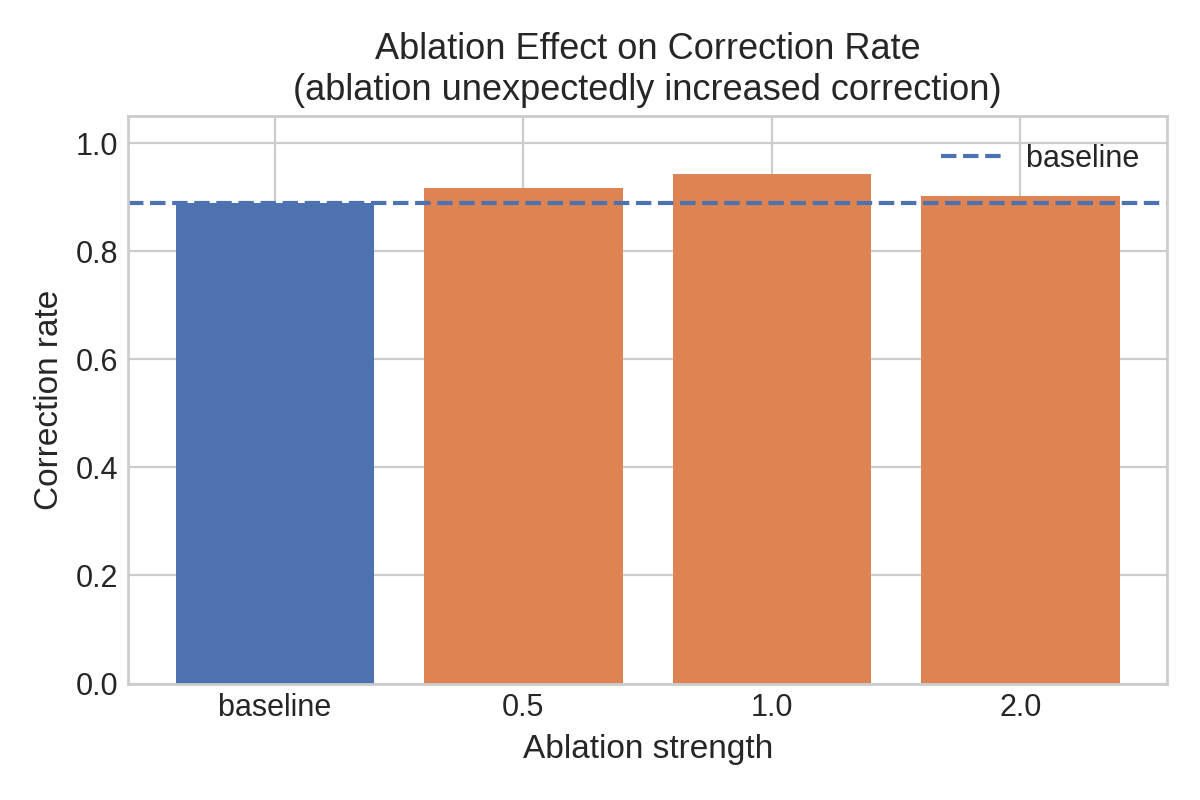

=== Combined Results ===


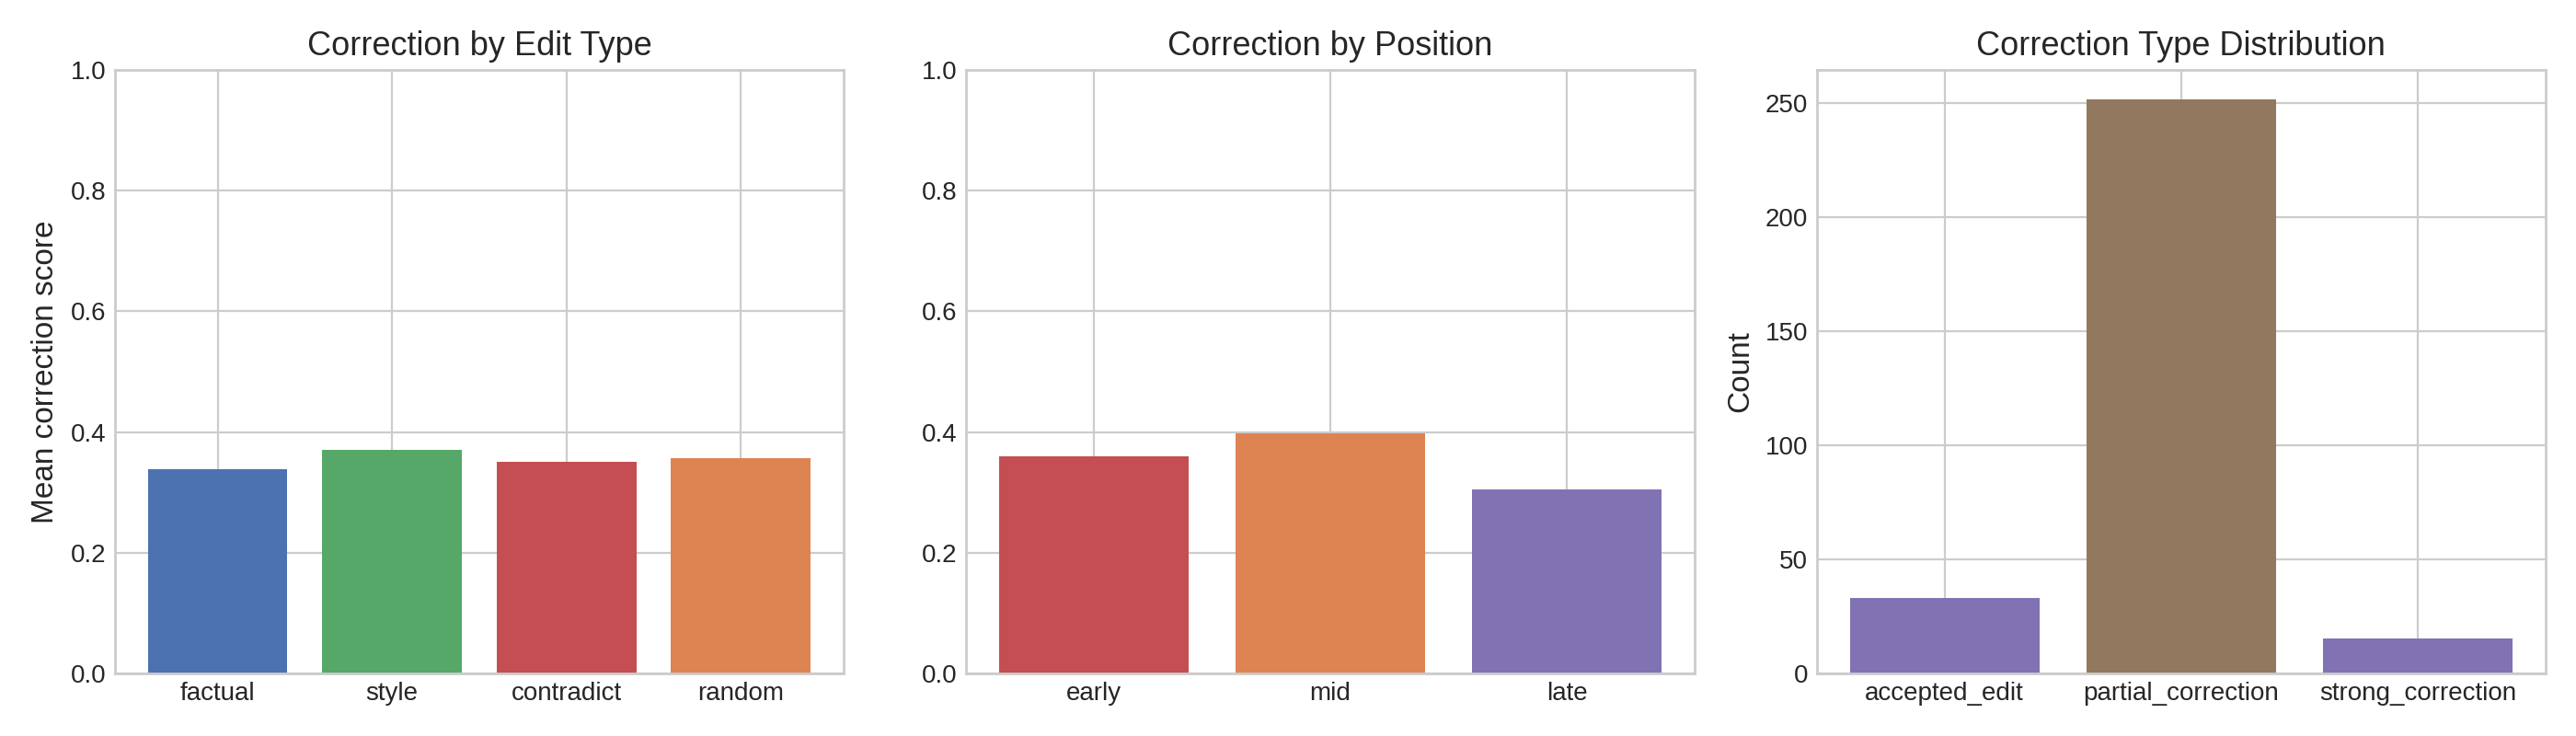

In [23]:
from IPython.display import Image, display

print("=== Ablation Effect ===")
display(Image('ablation_effect.png'))

print("=== Combined Results ===")
display(Image('combined_results.png'))

In [24]:
from google.colab import files

files.download('ablation_effect.png')
files.download('combined_results.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

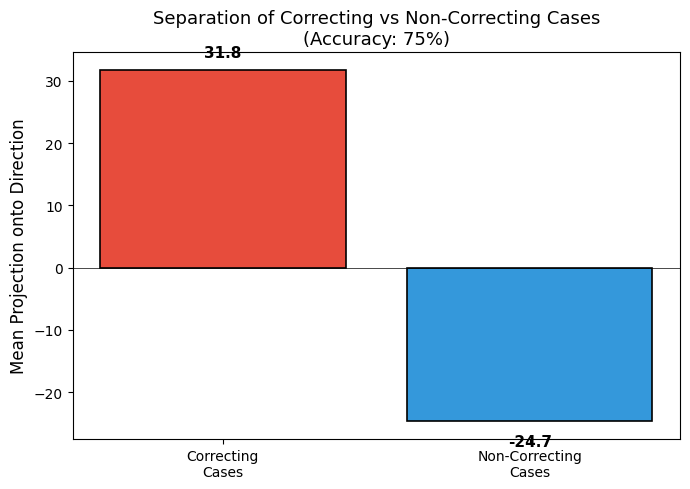

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
import matplotlib.pyplot as plt

# Data from your earlier terminal output
categories = ['Correcting\nCases', 'Non-Correcting\nCases']
means = [31.7812, -24.7031]
colors = ['#e74c3c', '#3498db']

fig, ax = plt.subplots(figsize=(7, 5))
bars = ax.bar(categories, means, color=colors, edgecolor='black', linewidth=1.2)
ax.set_ylabel('Mean Projection onto Direction', fontsize=12)
ax.set_title('Separation of Correcting vs Non-Correcting Cases\n(Accuracy: 75%)', fontsize=13)
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

for bar, val in zip(bars, means):
    offset = 2 if val > 0 else -4
    ax.text(bar.get_x() + bar.get_width()/2, val + offset, f'{val:.1f}', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('direction_separation.png', dpi=150)
plt.show()

files.download('direction_separation.png')

In [33]:
from google.colab import files

print("Creating zip file...")
!zip -r self_correction_mechanistic_analysis.zip *.ipynb *.png *.json *.csv *.txt

print("Starting download - check for browser popup!")
files.download('self_correction_mechanistic_analysis.zip')
print("Download initiated!")

Creating zip file...
	zip warning: name not matched: *.ipynb
	zip warning: name not matched: *.csv
updating: ablation_effect.png (deflated 17%)
updating: combined_results.png (deflated 23%)
updating: direction_separation.png (deflated 18%)
updating: mechanistic_results.json (deflated 58%)
updating: results.json (deflated 96%)
updating: requirements.txt (deflated 16%)
Starting download - check for browser popup!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download initiated!


FileNotFoundError: Cannot find file: self_correction_colab.ipynb